/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
[2016-06-09 13:25:32,675] Making new env: SpaceInvaders-v0


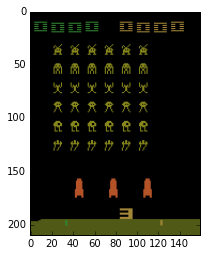

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

GAME_TITLE = 'SpaceInvaders-v0'
import gym
atari = gym.make(GAME_TITLE)
atari.reset()
plt.imshow(atari.render('rgb_array'))

In [43]:
import gym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
env = gym.make('FrozenLake-v0')
env.reset()

[2016-06-08 11:22:10,938] Making new env: FrozenLake-v0


0

## Deterministic human model

In [44]:
decision = {
    0 : 'down',
    1 : 'right',
    2 : 'down',
    3 : 'down', # end of first row
    4 : 'down', 
    5 : 'down',
    6 : 'down',
    7 : 'down', # end of second row
    8 : 'right',
    9 : 'right',
    10 : 'down',
    11 : 'down', #end of third row
    12 : 'right',
    13 : 'right',
    14 : 'right',
    15 : 'right'
}


action_table = {
    'left' : 0,
    'down' : 1,
    'right' : 2,
    'up' : 3
}

def make_action(obs):
    return action_table[decision[obs]]

#SFFF
#FHFH
#FFFH
#HFFG

In [45]:
# import gym
env = gym.make('FrozenLake-v0')
env.reset()

R = []

for i_episode in range(100000):
    observation = env.reset()
    #env.render()
    for t in range(100):
        #print '-------'
        action = make_action(observation)
        observation, reward, done, info = env.step(action)
        #print('observation: ' + str(observation))
        #print 'action: ' + str(action)
        #env.render()

        if done:
            R.append(reward)
            break
            
np.mean(R)

[2016-06-08 11:22:17,638] Making new env: FrozenLake-v0


0.037819999999999999

### Simple probabilistic model

In [46]:
# Policy takes in a state and outputs the action probability vectors
policy = {}
initprob = np.array([0.25,0.25,0.25,0.25])
for i in range(16):
    policy[i] = initprob
    
def make_decision(obs, policy):
    return np.random.choice(4, p = policy[obs] / sum(policy[obs]))

In [47]:
# import gym
env = gym.make('FrozenLake-v0')
env.reset()
from tqdm import tqdm
for i_episode in tqdm(range(100000)):
    observation = env.reset()
    #env.render()
    
    O = []
    A = []
    for t in range(100):
        #print '-------'
        action = np.random.choice(4, p = policy[observation] / sum(policy[observation]))#make_decision(observation, policy)
        observation, reward, done, info = env.step(action)
        O.append(observation)
        A.append(action)

        if done:
            #print policy
            for a,o, tt in zip(A,O,range(t)):
                policy[o][a] = policy[o][a]*0.995 + 0.005*np.minimum(1,np.maximum(reward, 0))
                policy[o] = policy[o] / sum(policy[o])

            break

[2016-06-08 11:22:28,919] Making new env: FrozenLake-v0
 85%|████████▌ | 85379/100000 [00:41<00:05, 2659.88it/s]


KeyboardInterrupt: 

In [41]:
print action_table
print i_episode
print observation
#print policy
print policy[observation] #/ sum(policy[observation])
#SFFF
#FHFH
#FFFH
#HFFG

{'down': 1, 'right': 2, 'up': 3, 'left': 0}
99999
7
[ 0.255025    0.23774751  0.240149    0.25      ]


In [42]:
# import gym
env = gym.make('FrozenLake-v0')
env.reset()

R = []

for i_episode in tqdm(range(50000)):
    observation = env.reset()
    #env.render()
    for t in range(100):
        #print '-------'
        action = np.random.choice(4, p = policy[observation] / sum(policy[observation]))#make_decision(observation, policy)
        observation, reward, done, info = env.step(action)
        #print('observation: ' + str(observation))
        #print 'action: ' + str(action)
        #env.render()

        if done:
            R.append(reward)
            break
            
np.mean(R)

[2016-06-07 23:19:44,742] Making new env: FrozenLake-v0
100%|██████████| 50000/50000 [00:15<00:00, 3184.67it/s]


0.0094599999999999997

In [ ]:
# random walk gives 0.0138
# 10'000 trains gives 0.0195
# 100k trains gives 0.0129